<a href="https://colab.research.google.com/github/Gunseerat/Gunseerat/blob/main/Deeplearning_Detection_of_gender_using_eye_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and initial loading of data

In [ ]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving eye_gender_data.zip to eye_gender_data (1).zip
User uploaded file "eye_gender_data.zip" with length 26794203 bytes


unzip dataset

In [ ]:
!unzip eye_gender_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: eye_gender_data/train/Image_4799.jpg  
  inflating: eye_gender_data/train/Image_48.jpg  
  inflating: eye_gender_data/train/Image_480.jpg  
  inflating: eye_gender_data/train/Image_4800.jpg  
  inflating: eye_gender_data/train/Image_4801.jpg  
  inflating: eye_gender_data/train/Image_4802.jpg  
  inflating: eye_gender_data/train/Image_4803.jpg  
  inflating: eye_gender_data/train/Image_4804.jpg  
  inflating: eye_gender_data/train/Image_4805.jpg  
  inflating: eye_gender_data/train/Image_4806.jpg  
  inflating: eye_gender_data/train/Image_4807.jpg  
  inflating: eye_gender_data/train/Image_4808.jpg  
  inflating: eye_gender_data/train/Image_4809.jpg  
  inflating: eye_gender_data/train/Image_481.jpg  
  inflating: eye_gender_data/train/Image_4810.jpg  
  inflating: eye_gender_data/train/Image_4811.jpg  
  inflating: eye_gender_data/train/Image_4812.jpg  
  inflating: eye_gender_data/train/Image_4813.jpg  
  inflating: eye_

Loading data for pre processing

In [ ]:
train_data = pd.read_csv("/content/eye_gender_data/Training_set.csv")
test_data = pd.read_csv("/content/eye_gender_data/Testing_set.csv")
train_data.head

<bound method NDFrame.head of             filename   label
0        Image_1.jpg    male
1        Image_2.jpg  female
2        Image_3.jpg  female
3        Image_4.jpg  female
4        Image_5.jpg    male
...              ...     ...
9215  Image_9216.jpg    male
9216  Image_9217.jpg    male
9217  Image_9218.jpg    male
9218  Image_9219.jpg    male
9219  Image_9220.jpg  female

[9220 rows x 2 columns]>

Giving paths of images to csv labels

In [ ]:
train_paths = [os.path.join("/content/eye_gender_data/train", x) for x in train_data['filename']]
test_paths = [os.path.join("/content/eye_gender_data/test", x) for x in test_data['filename']]

Add this to csv file so this can be used for further classification

In [ ]:
train_data['image_path'] = train_paths
test_data['image_path'] = test_paths
train_data = train_data[['image_path','label', 'filename']]
train_data.head

<bound method NDFrame.head of                                          image_path   label        filename
0        /content/eye_gender_data/train/Image_1.jpg    male     Image_1.jpg
1        /content/eye_gender_data/train/Image_2.jpg  female     Image_2.jpg
2        /content/eye_gender_data/train/Image_3.jpg  female     Image_3.jpg
3        /content/eye_gender_data/train/Image_4.jpg  female     Image_4.jpg
4        /content/eye_gender_data/train/Image_5.jpg    male     Image_5.jpg
...                                             ...     ...             ...
9215  /content/eye_gender_data/train/Image_9216.jpg    male  Image_9216.jpg
9216  /content/eye_gender_data/train/Image_9217.jpg    male  Image_9217.jpg
9217  /content/eye_gender_data/train/Image_9218.jpg    male  Image_9218.jpg
9218  /content/eye_gender_data/train/Image_9219.jpg    male  Image_9219.jpg
9219  /content/eye_gender_data/train/Image_9220.jpg  female  Image_9220.jpg

[9220 rows x 3 columns]>

distributing into folders with separate labels

In [ ]:
Root = "/content/eye_gender_data"
new_folder = "train1"
val_folder = "Label"
_dir = os.path.join(Root,val_folder)
if not os.path.exists(_dir):
  os.makedirs(_dir)

In [ ]:
target_folders = ['train1','Label']
labels = train_data.label.values.tolist()
for f in target_folders:
  for label in labels:
    _dir = os.path.join(Root,f,label)
    if not os.path.exists(_dir):
      os.makedirs(_dir)

In [ ]:
import shutil
from tqdm import tqdm
for data in tqdm(train_data.values.tolist()):
  images = data[0]
  lbls = data[1]
  dest = os.path.join(Root,'train1',lbls)
  if os.stat(images).st_size != 0:
    shutil.copy(images,dest)

100%|██████████| 9220/9220 [00:00<00:00, 9338.35it/s]


creating dataset by giving parameters

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

splitting validation data at 80-20

In [ ]:
data_dir = '/content/eye_gender_data/train1'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9220 files belonging to 2 classes.
Using 7376 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9220 files belonging to 2 classes.
Using 1844 files for validation.


checking for class names

In [ ]:
class_names = train_ds.class_names
print(class_names)

['female', 'male']


visualise the dataset

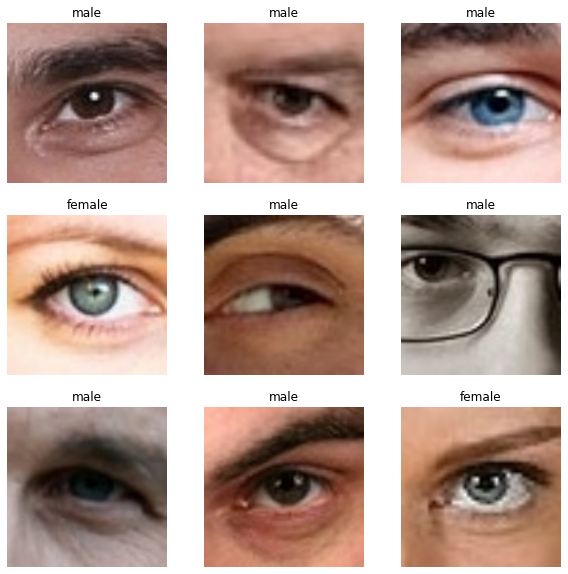

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

autotune dataset

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

standardise using keras preprocessing

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

data augmentation

In [ ]:
data_aug = tf.keras.Sequential(
  [
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
  ]  
)

creating model alongside augmentation and other layers

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
num_classes= 2
model = Sequential([
  data_aug,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

compile model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

train model

In [ ]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


231/231 [==============================] - 256s 979ms/step - loss: 0.7798 - accuracy: 0.5480 - val_loss: 0.6260 - val_accuracy: 0.7077
Epoch 2/5
231/231 [==============================] - 224s 971ms/step - loss: 0.5831 - accuracy: 0.7144 - val_loss: 0.4560 - val_accuracy: 0.7847
Epoch 3/5
231/231 [==============================] - 224s 970ms/step - loss: 0.5050 - accuracy: 0.7688 - val_loss: 0.4070 - val_accuracy: 0.8059
Epoch 4/5
231/231 [==============================] - 225s 973ms/step - loss: 0.4610 - accuracy: 0.7920 - val_loss: 0.3356 - val_accuracy: 0.8574
Epoch 5/5
231/231 [==============================] - 225s 973ms/step - loss: 0.4125 - accuracy: 0.8162 - val_loss: 0.3857 - val_accuracy: 0.8172


visualising results

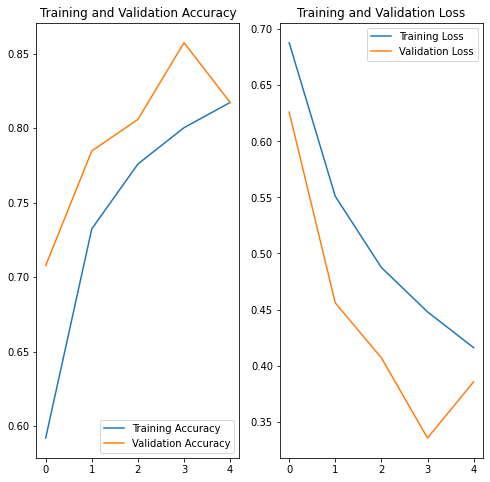

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

generate test file

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_data,
directory=None,
x_col="image_path",
y_col=None,
batch_size=1,
seed=42,
shuffle=False,
class_mode=None,
target_size=(180,180))

Found 2305 validated image filenames.


check for validation

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, verbose= 2)
print(test_acc)

In [ ]:
pred = model.predict(test_generator)
predicted_label = np.argmax(pred, axis=1)
class_names = ['female', 'male']
final = [class_names[i] for i in predicted_label]

saving finals

In [ ]:
res = pd.DataFrame(pred)
print(res)

from google.colab import files
res.to_csv('submission.csv', inplace = False)         
files.download('submission.csv')